In [148]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [149]:
from importlib import reload
import matrixTree as mT
reload(mT)

<module 'matrixTree' from '/home/cosmo/Documents/projects/groupeModulaire/matrixTree.py'>

In [150]:
import plotting_routines as pR
reload(pR)

<module 'plotting_routines' from '/home/cosmo/Documents/projects/groupeModulaire/plotting_routines.py'>

# Running

In [19]:
BASE_HEIGHT = 17
root = mT.construct_tree(mT.get_max_height_criterion(BASE_HEIGHT))
mT.tree_size(root)

262143

In [9]:
all_nodes = mT.list_of_descendants(root)
all_coords = np.array([n.get_coord() for n in all_nodes])
all_traces = np.array([n.get_trace() for n in all_nodes])

## Plotting all matrices with height <= BASE_HEIGHT, color is trace

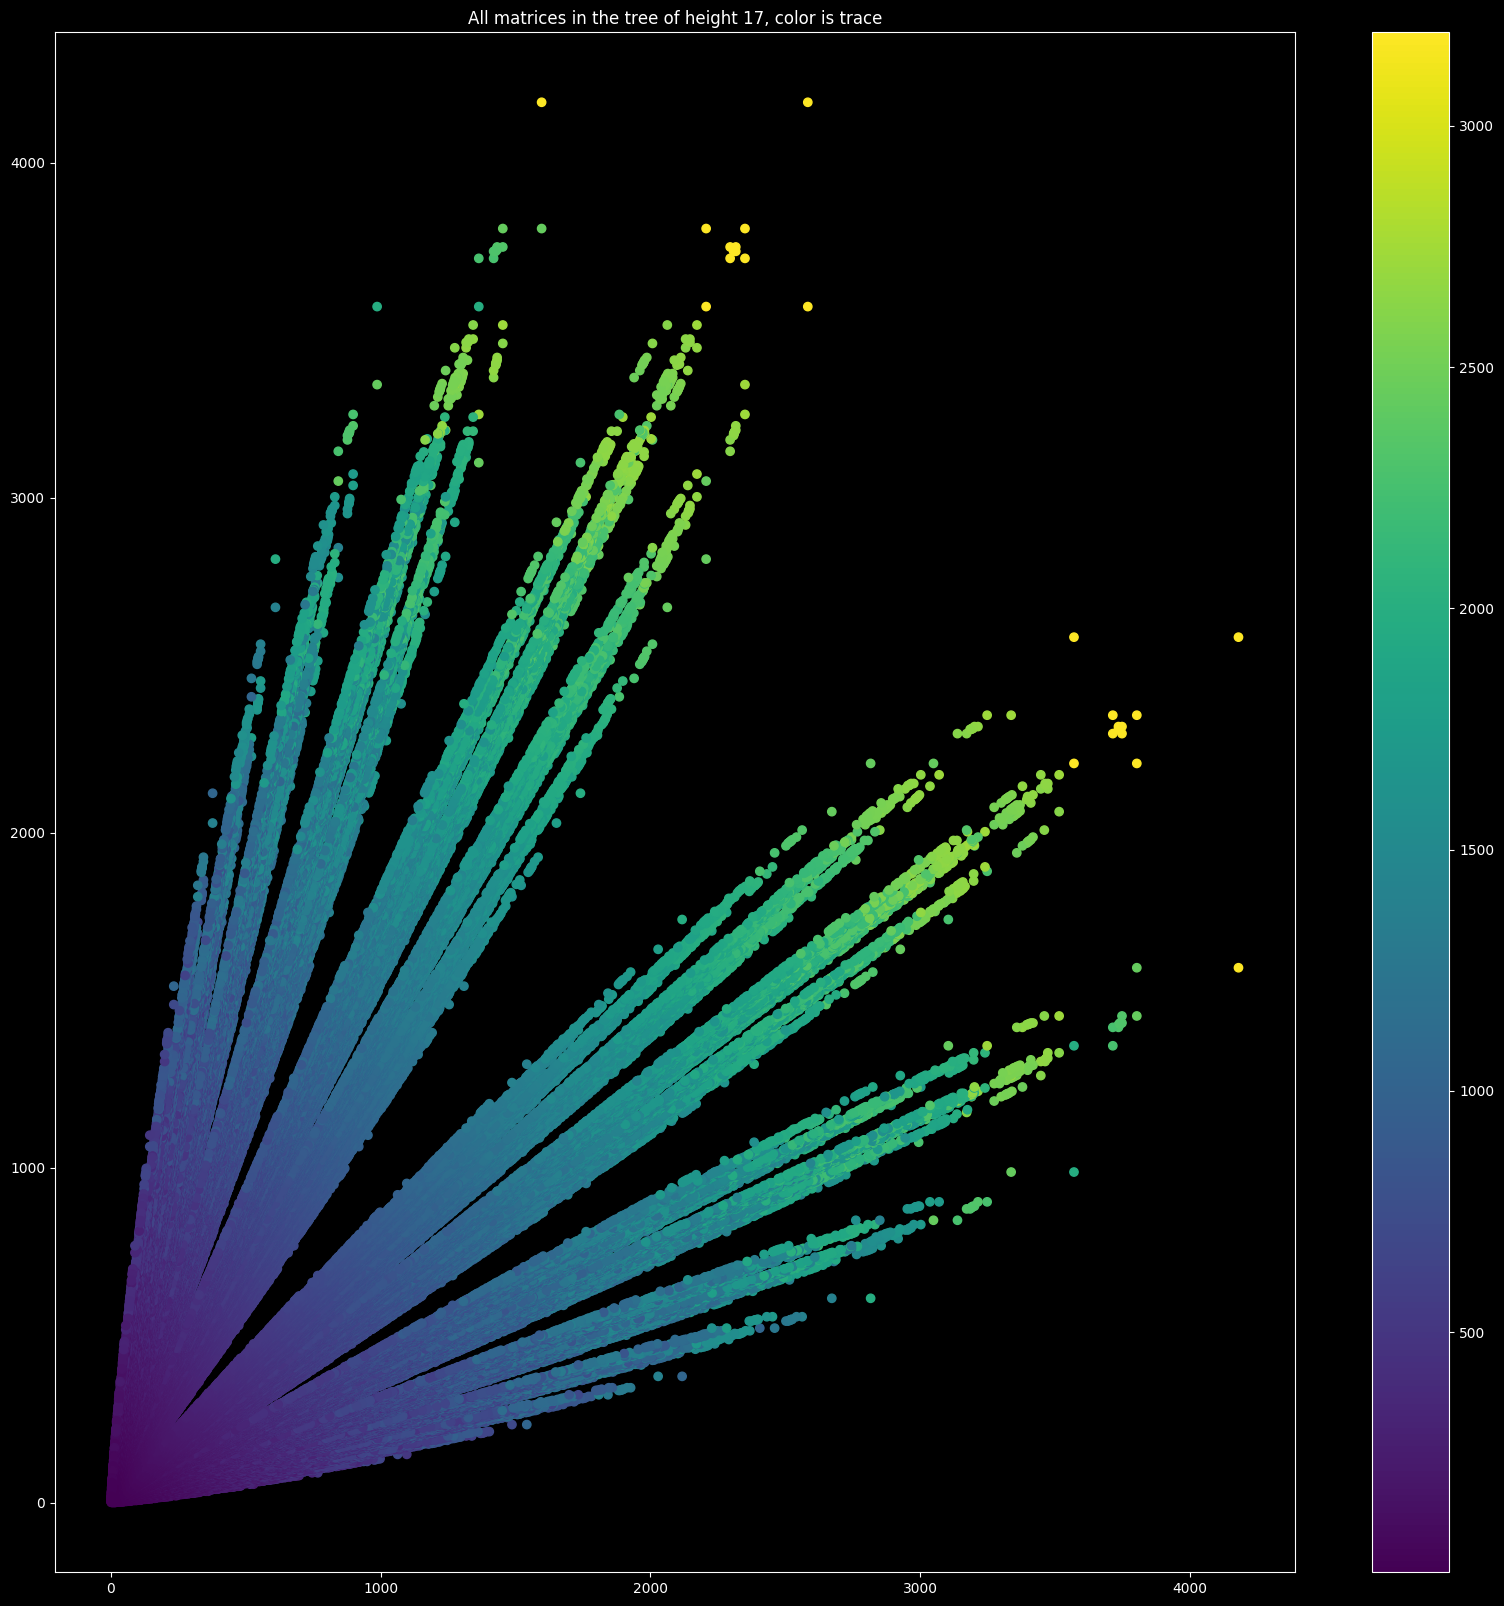

In [145]:
plt.figure(figsize=(20,20))
plt.scatter(all_coords[:,0], all_coords[:,1], c=all_traces)
plt.colorbar()
plt.title("All matrices in the tree of height {}, color is trace".format(BASE_HEIGHT))
plt.savefig('images/matrix_scatter/all_matrices_height{}.png'.format(BASE_HEIGHT))
plt.show()

## Plotting all height 17 matrices in the 100x100 square, color is trace

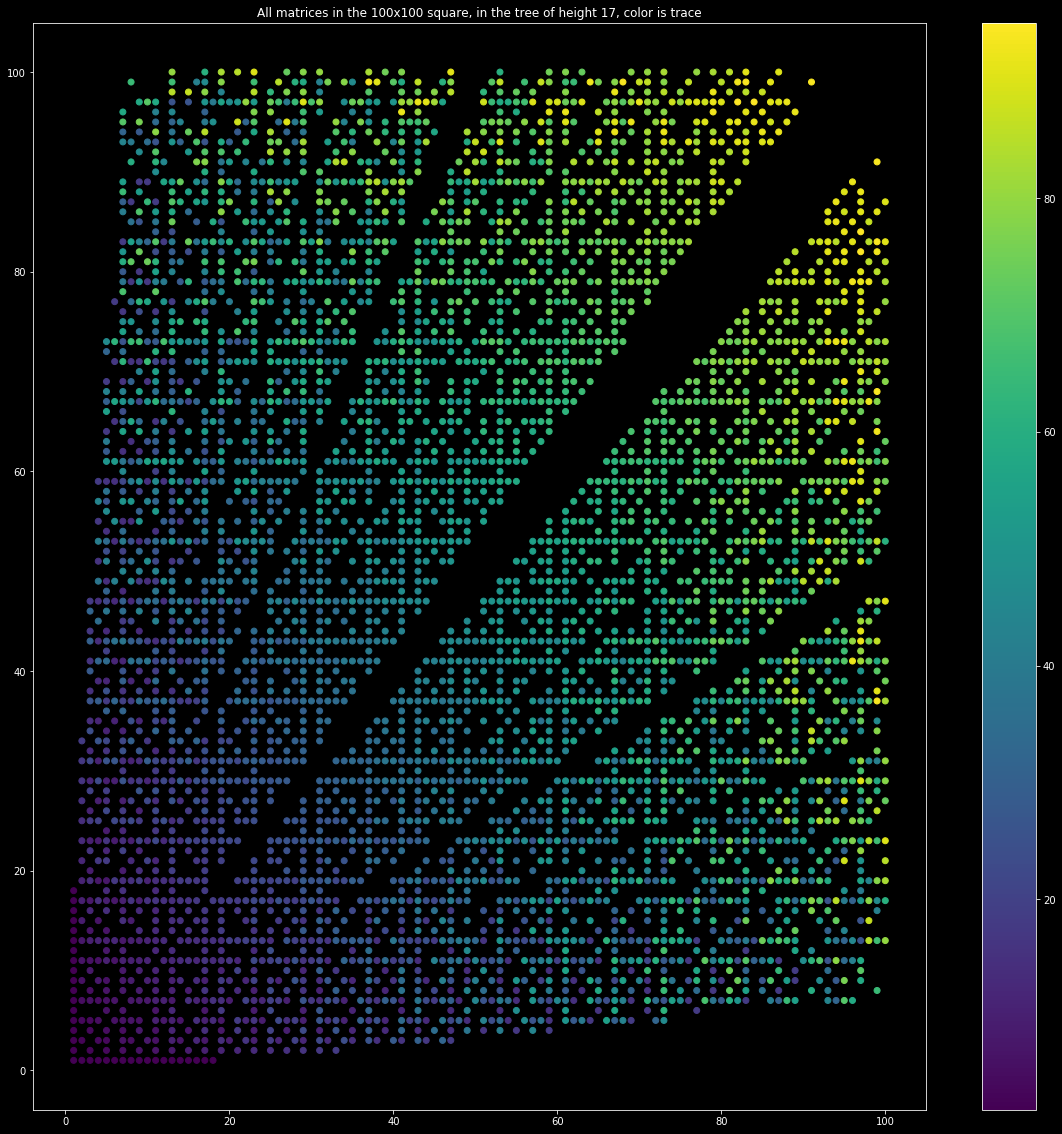

In [26]:
filter_ = (all_coords[:, 0] <= 100)*(all_coords[:, 1] <= 100)
plt.figure(figsize=(20,20))
plt.scatter(all_coords[filter_,0], all_coords[filter_,1], c=all_traces[filter_])
plt.colorbar()
plt.title("All matrices in the 100x100 square, in the tree of height {}, color is trace".format(BASE_HEIGHT))
plt.savefig('images/matrix_scatter/all_matrices_100x100height{}.png'.format(BASE_HEIGHT))
plt.show()

## Plotting matrices per trace

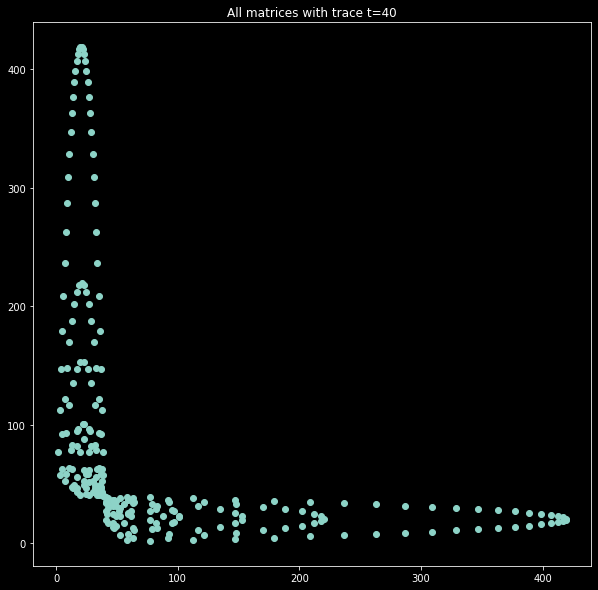

In [132]:
pR.plot_matrix_per_trace(40)

## Plotting matrices per trace and conjugaison classes

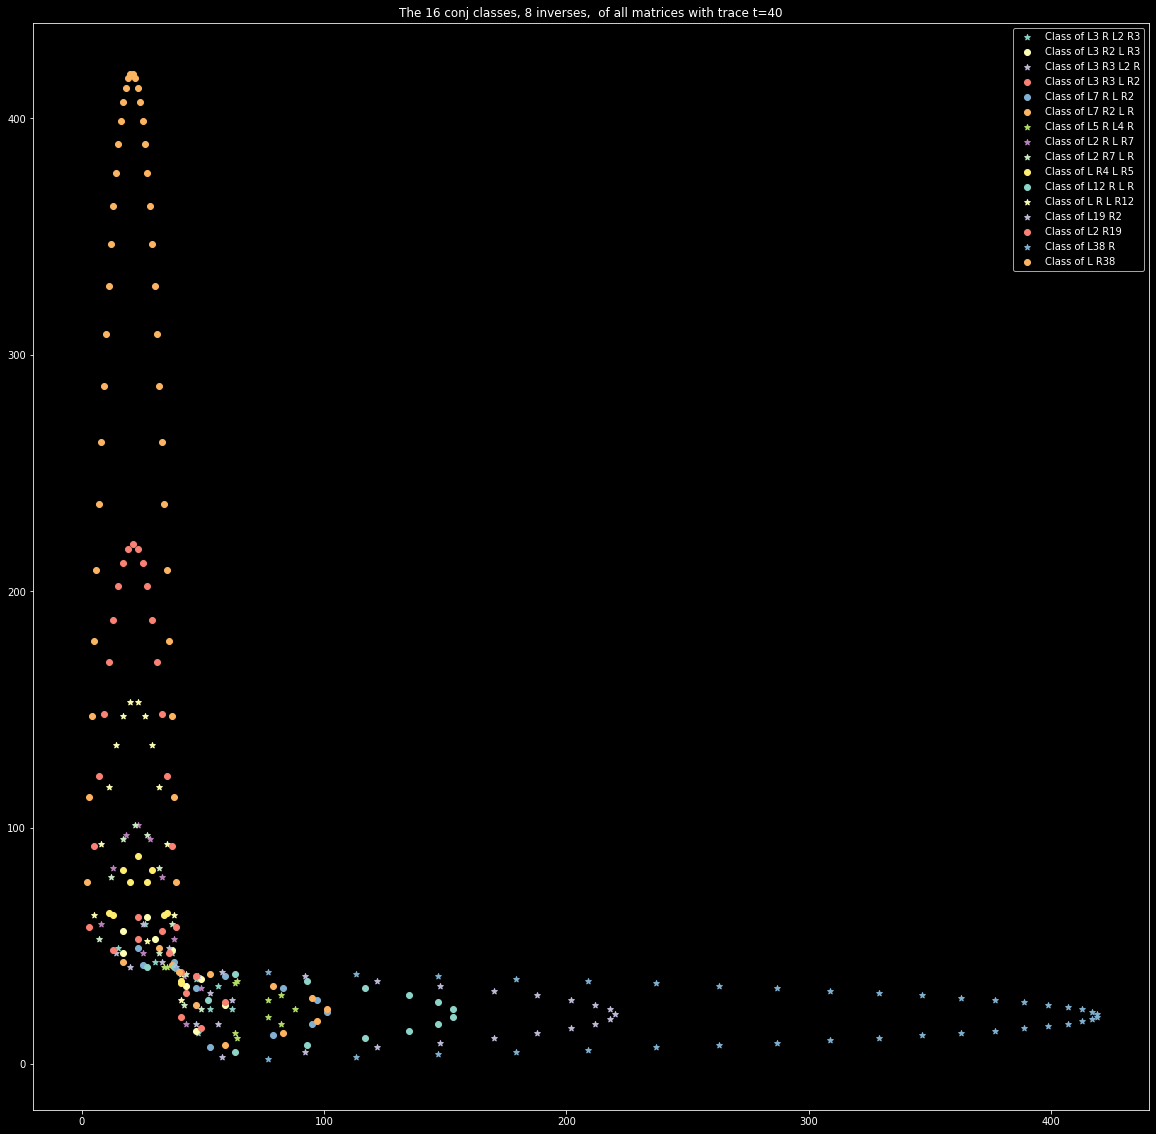

In [133]:
inversibles = ["L38 R", "L3 R3 L2 R", "L R L R12", "L3 R L2 R3", "L19 R2", "L2 R7 L R", "L5 R L4 R", "L2 R L R7"]
pR.plot_matrix_per_trace_with_conj_class(40, inversibles=inversibles, figsize=(20,20))

### Only inversibles

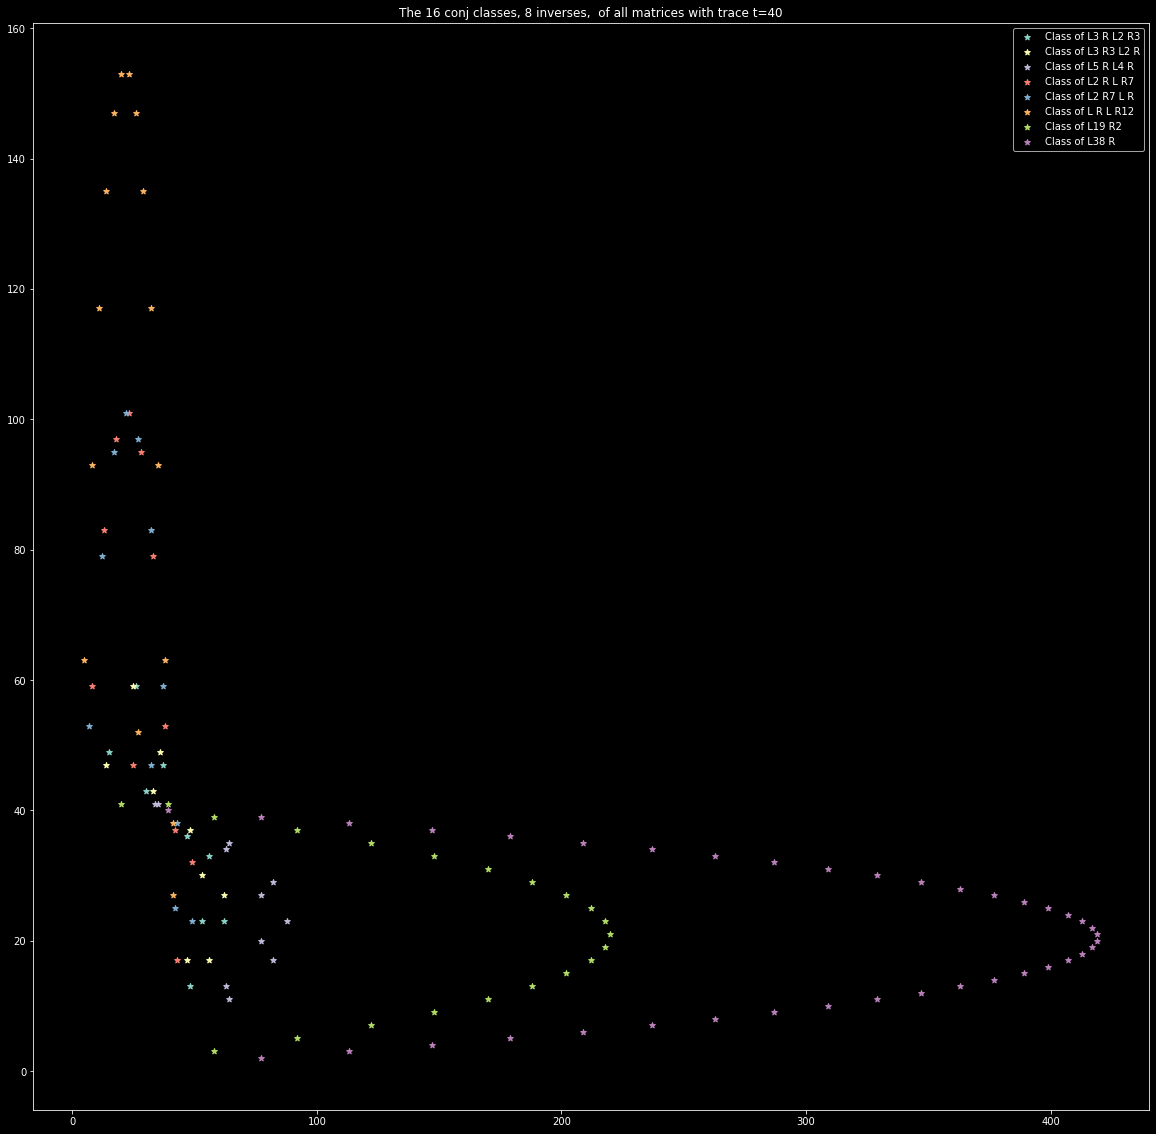

In [134]:
pR.plot_matrix_per_trace_with_conj_class(40, inversibles=inversibles, only_inverse=True, figsize=(20,20))

# Enlacement

In [200]:
reload(mT)

<module 'matrixTree' from '/home/cosmo/Documents/projects/groupeModulaire/matrixTree.py'>

In [174]:
def get_addresses(root, predicate):
    all_nodes = mT.get_nodes_with_property(root, predicate)
    return [n.address for n in all_nodes]

In [204]:
def get_enl_matrix(root, size):
    addresses = get_addresses(root, lambda n: len(n.address) == size)
    conj_class = {}
    
    for a in addresses:
        rep = mT.get_circular_rep(a)
        conj_class[rep] = True
        
    print(len(addresses), len(conj_class))
    
    all_reps = sorted(conj_class.keys())
    
    enl_mat = []
    for rep1 in conj_class:
        enl_mat.append([])
        for rep2 in conj_class:
            enl_mat[-1].append(mT.enl(rep1,rep2))
            
    enl_mat = np.array(enl_mat)
    return all_reps, enl_mat

In [205]:
all_reps, enl_mat = get_enl_matrix(root,7)

128 20


In [213]:
for i,rep1 in enumerate(all_reps):
    for j,rep2 in enumerate(all_reps):
        print("enl({},{})={}".format(rep1,rep2,enl_mat[i,j]))

enl(LLLLLLL,LLLLLLL)=0.0
enl(LLLLLLL,LLLLLLR)=0.0
enl(LLLLLLL,LLLLLRR)=0.0
enl(LLLLLLL,LLLLRLR)=0.0
enl(LLLLLLL,LLLLRRR)=0.0
enl(LLLLLLL,LLLRLLR)=0.0
enl(LLLLLLL,LLLRLRR)=0.0
enl(LLLLLLL,LLLRRLR)=0.0
enl(LLLLLLL,LLLRRRR)=0.0
enl(LLLLLLL,LLRLLRR)=0.0
enl(LLLLLLL,LLRLRLR)=0.0
enl(LLLLLLL,LLRLRRR)=0.0
enl(LLLLLLL,LLRRLRR)=0.0
enl(LLLLLLL,LLRRRLR)=0.0
enl(LLLLLLL,LLRRRRR)=0.0
enl(LLLLLLL,LRLRLRR)=0.0
enl(LLLLLLL,LRLRRRR)=0.0
enl(LLLLLLL,LRRLRRR)=0.0
enl(LLLLLLL,LRRRRRR)=0.0
enl(LLLLLLL,RRRRRRR)=0.0
enl(LLLLLLR,LLLLLLL)=0.0
enl(LLLLLLR,LLLLLLR)=6.0
enl(LLLLLLR,LLLLLRR)=1.0
enl(LLLLLLR,LLLLRLR)=7.0
enl(LLLLLLR,LLLLRRR)=1.0
enl(LLLLLLR,LLLRLLR)=7.0
enl(LLLLLLR,LLLRLRR)=4.0
enl(LLLLLLR,LLLRRLR)=4.0
enl(LLLLLLR,LLLRRRR)=1.0
enl(LLLLLLR,LLRLLRR)=4.0
enl(LLLLLLR,LLRLRLR)=7.0
enl(LLLLLLR,LLRLRRR)=3.5
enl(LLLLLLR,LLRRLRR)=2.0
enl(LLLLLLR,LLRRRLR)=3.5
enl(LLLLLLR,LLRRRRR)=1.0
enl(LLLLLLR,LRLRLRR)=5.0
enl(LLLLLLR,LRLRRRR)=3.0
enl(LLLLLLR,LRRLRRR)=2.0
enl(LLLLLLR,LRRRRRR)=1.0
enl(LLLLLLR,RRRRRRR)=0.0


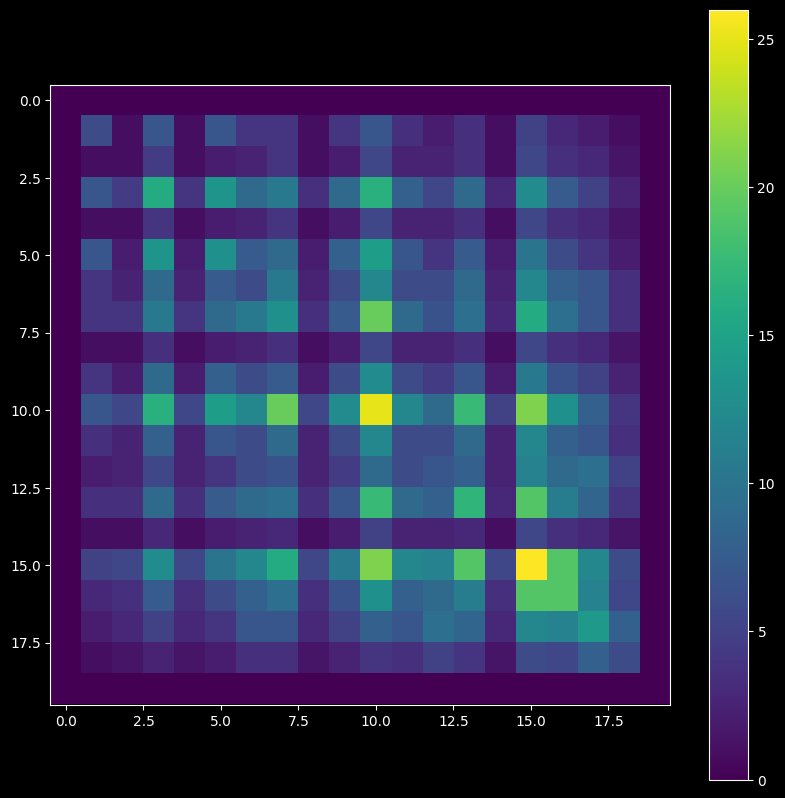

In [210]:
plt.figure(figsize=(10,10))
plt.imshow(enl_mat)
plt.colorbar()
plt.savefig('images/enl/enl7x7.png')
plt.show()